# Johnson/Shot Noise Individual Analysis (Winter 2022)

Use this template to carry out the analysis tasks for the Noise experiment.  For reference, here are links to recommended Python resources: the [Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/) and the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) both by Jake VanderPlas.
## First, import some packages

This is a good idea at the beginning of your notebook to include the packages that you will need.  We will use those shown below here.  A brief description:
* `numpy` is the foundational package for Python numerical work. It extends and speeds up array operations beyond standard Python, and it includes almost all math functions that you would need for example `sqrt()` (square root) or `cos()` (cosine).  These would be written in code as `np.sqrt()` or `np.cos()`.
* `scipy` is a huge collection of scientific data analysis functions, routines, physicical constants, etc.  This is the second most used package for scientific work. Here we will use the physical constants library, `scipy.constants`.  Documentation is at [SciPy.org](https://docs.scipy.org/doc/scipy/reference/) with the constants subpackage at https://docs.scipy.org/doc/scipy/reference/constants.html.
* `uncertainties` is a very useful small package that simplifies uncertainty propagation and printing out of quantities with uncertainty. Documentation is at https://pythonhosted.org/uncertainties/
* `matplotlib` is *the* standard plotting package for scientific Python.  We will use a subset called `pyplot` which is modeled after the plotting functions used in MATLAB. The last line below, `%matplotlib inline`, simply forces the plots to appear within the notebook.
* `pandas` is a large data science package.  It's main feature is a set of methods to create and manipulate a "DataFrame," which is an enlargement of the idea of an array.  I plays well with NumPy and other packages.  We will use it mainly as a way to read files into data sets in an easy way.

We will also use the [LMFit](https://lmfit.github.io/lmfit-py/) package to make line fits.  This will be explained later in the notebook.

In [ ]:
!pip install uncertainties
!pip install lmfit

In [ ]:
# Run this cell with Shift-Enter, and wait until the
# asterisk changes to a number, i.e., [*] becomes [1]
import numpy as np
import scipy.constants as const
import uncertainties as unc
from uncertainties.umath import log10, sqrt
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Johnson Noise Analysis

## Exercise 1 -  Data reduction
### Read in the raw data

**About the data files:**  The spreadsheets show columns with headings of the resistance for Johnson noise or emission current for shot noise.  The values themselves are volts RMS.  You will want to average these and obtain the standard deviations before analyzing and plotting.

**Advice:** Use the **Pandas** function `read_csv()` to pull the file into a Pandas Dataframe, like this:

    johnson_294 = pd.read_csv('Johnson_294K.csv')

If the last line in the code cell is the name of the DataFrame (`johnson_294`), the notebook cell will print a nice table.

You may obtain the arrays for each column by using the column label, e.g., `johnson_294['40.0k']` is the array of the first column.

We had already calculated the mean and std in our spreadsheet, so we just delete the trial columns in this section.

In [ ]:
## Lines below show how to read in a CSV data set and display it.

johnson_294 = pd.read_csv('/content/Johnson and Shot Noise data - Room_Temp_Johnson.csv')


drop_columns = ['Rms reading 1 ', 'Rms reading 2', 'Rms reading 3',
       'Rms reading 4', 'Rms reading 5']

johnson_294  = johnson_294.drop(columns=drop_columns)




# johnson_294['Average Rms '] = johnson_294['Average Rms ']
# johnson_294['Std Rms'] = johnson_294['Std Rms']



print(johnson_294.head())


   Resistance (Ohms)  Average Rms    Std Rms
0              40000      0.007892  0.000044
1              20000      0.005775  0.000050
2              15000      0.005100  0.000041
3               9990      0.004093  0.000027
4               7500      0.003645  0.000006


#### Repeat for the other temperature

Now you try it for the other temeperature data set.

In [ ]:
## Read in the data set and display it
johnson_77 = pd.read_csv('/content/Johnson and Shot Noise data - Liquid_N_Johnson.csv')

drop_columns = ['Rms reading 1 ', 'Rms reading 2', 'Rms reading 3',
       'Rms reading 4', 'Rms reading 5']

johnson_77  = johnson_77.drop(columns=drop_columns)


print(johnson_77.head())


   Resistance (Ohms)  Average Rms    Std Rms
0              40000      0.004190  0.000028
1              20000      0.003076  0.000022
2              15000      0.002723  0.000041
3               9990      0.002240  0.000022
4               7500      0.001974  0.000027


### Plot the reduced data

Plot the data set of $V_{rms}$ vs $R$ to see what it looks like.

Below, I'll show how. Study the commands, change them, and see what happens.  Hint: study the sections in the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) on Matplotlib.

After you make the plot, always look to make sure your data set does not have any weird points. This is a good way to catch bad data and/or mistakes.

In [ ]:
# Set up plot defaults  This cell only needs to be executed once.
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 11.0,8.0  # Roughly 11 cm wde by 8 cm high
mpl.rcParams['font.size'] = 12.0 # Use 12 point font

In [ ]:
print(johnson_294.columns)

Index(['Resistance (Ohms)', 'Average Rms ', 'Std Rms'], dtype='object')


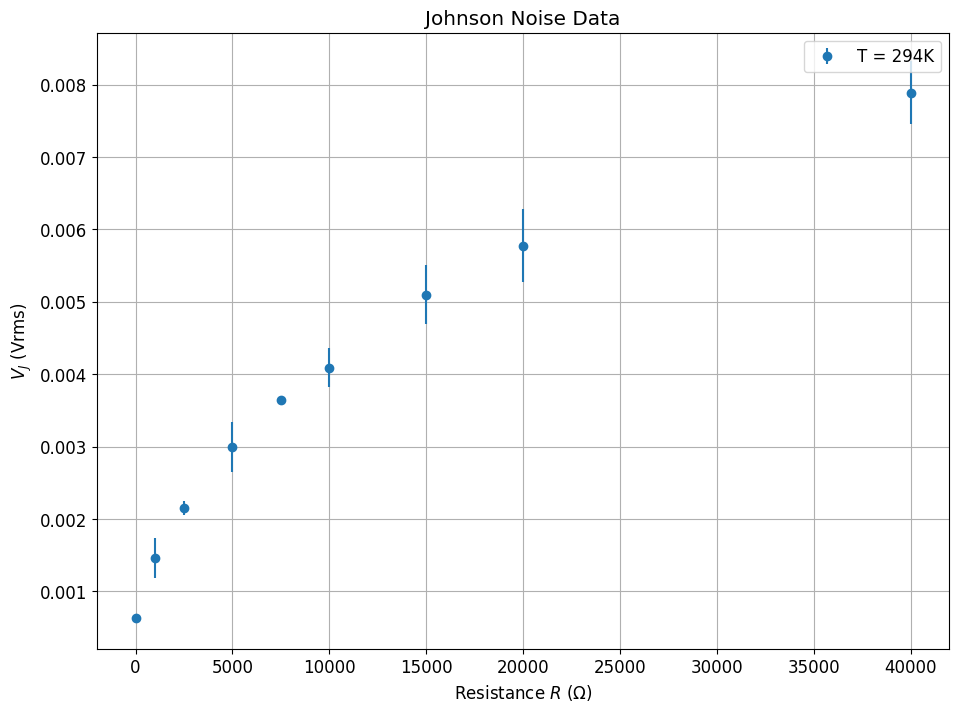

In [ ]:
## Plot the data sets on one graph
## Header commands provided

plt.grid() # Turn on the grid
plt.title('Johnson Noise Data') # make a plot title
plt.ylabel(r'$V_J$ (Vrms)') # Make an axis label.  Note the $$ to typeset math
plt.xlabel(r'Resistance $R$ ($\Omega$)') #Another axis label

# Below shows how to make a plot with error bars.  The errors are multiplied by
# 10 so that the bars are visible.
plt.errorbar(johnson_294['Resistance (Ohms)'],johnson_294['Average Rms '],
             yerr=johnson_294['Std Rms']*10,fmt='o',label='T = 294K')
plt.legend(); # Make a legend

### Include the other data

Repeat the lines in the cell above and include another data set so that both the 294K and 77K data are on the same plot.

In [ ]:
johnson_77['Average Rms ']

0    0.004190
1    0.003076
2    0.002723
3    0.002240
4    0.001974
5    0.001645
6    0.001258
7    0.000963
8    0.000587
Name: Average Rms , dtype: float64

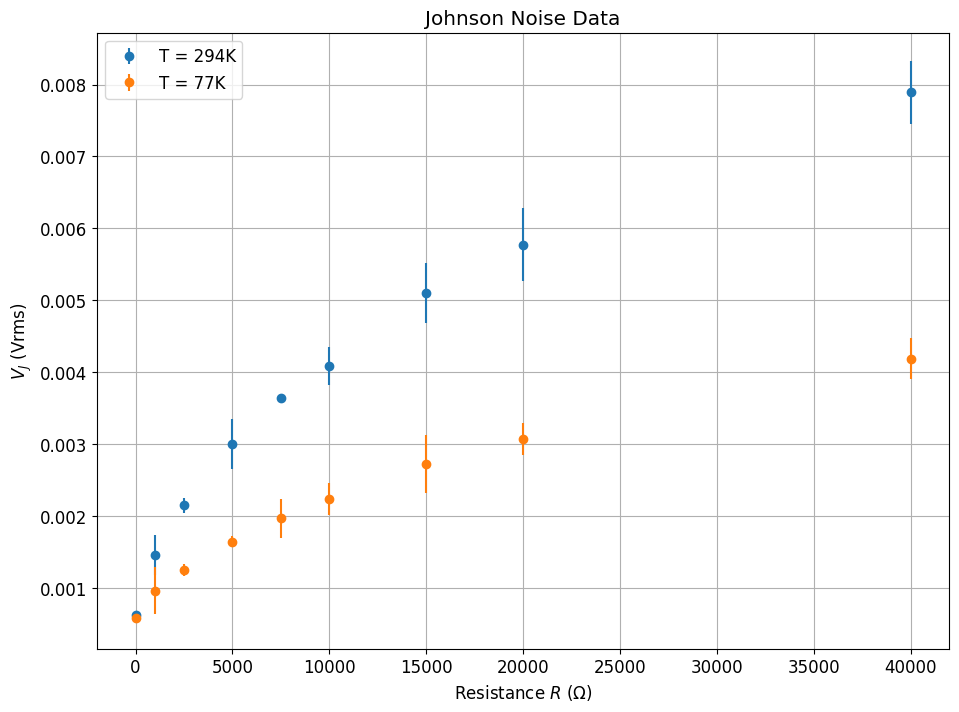

In [ ]:
## You code this cell.


plt.grid() # Turn on the grid
plt.title('Johnson Noise Data') # make a plot title
plt.ylabel(r'$V_J$ (Vrms)') # Make an axis label.  Note the $$ to typeset math
plt.xlabel(r'Resistance $R$ ($\Omega$)') #Another axis label

# Below shows how to make a plot with error bars.  The errors are multiplied by
# 10 so that the bars are visible.
plt.errorbar(johnson_294['Resistance (Ohms)'],johnson_294['Average Rms '],
             yerr=johnson_294['Std Rms']*10,fmt='o',label='T = 294K')

plt.errorbar(johnson_77['Resistance (Ohms)'],johnson_77['Average Rms '],
             yerr=johnson_77['Std Rms']*10,fmt='o',label='T = 77K')
plt.legend(); # Make a legend

## Exercise 2

### Part a.  Modify the data

Modify the data arrays to (1) obtain the mean square voltages for each temperature, and (2) the difference in the (squared) data for the two temperatures.  **Remember:** You have NumPy/Pandas arrays, so you can do each task with a single line of code.

Then plot the results, all on one plot so yoy can compare them visually.

In [ ]:
## Modify the arrays as specified above

johnson_77['Square Voltage (V^2)'] = johnson_77['Average Rms '] **2


johnson_294['Square Voltage (V^2)'] = johnson_294['Average Rms '] **2


squared_diffence = johnson_294['Square Voltage (V^2)'] - johnson_77['Square Voltage (V^2)']

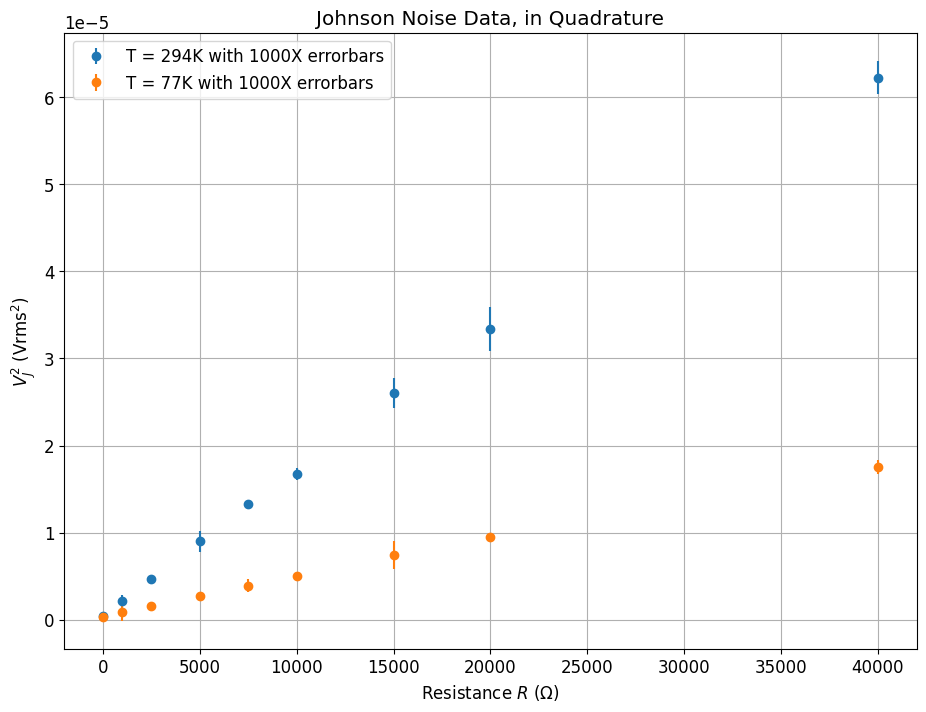

In [ ]:
## Plot the results
## Header commands provided to format plot

plt.errorbar(johnson_294['Resistance (Ohms)'],johnson_294['Square Voltage (V^2)'],
             yerr=(johnson_294['Std Rms']**2) * 1000 ,fmt='o',label='T = 294K with 1000X errorbars')



plt.errorbar(johnson_77['Resistance (Ohms)'],johnson_77['Square Voltage (V^2)'],
             yerr=(johnson_77['Std Rms']**2) * 1000 ,fmt='o',label='T = 77K with 1000X errorbars')


plt.grid()
plt.title('Johnson Noise Data, in Quadrature')
plt.ylabel(r'$V^2_J$ (Vrms$^2$)')
plt.xlabel(r'Resistance $R$ ($\Omega$)')
## Add your code here
plt.legend();

### Part b. Fit the modified data

To fit the data set to a line, make use of the **LMFit** package. It is a useful add-on to the SciPy fitting functions.  This package simplifies fitting data to a variety of standard functions.  See the [Lmfit Documentation](https://lmfit.github.io/lmfit-py/index.html) for a full discussion.  The package is quite powerful, but for basic fitting with common functions, it is very easy to use.  

#### Example: Fitting a line

The example below shows how to use the package to fit data to a line, obtain the fit parameters along with uncertainties, and then plot the data and fit. Execute the cells and study how it works.
(Note: the data come from a calibration problem in physics 331)

The following cell executes the fitting calculations.

In [ ]:
from lmfit.models import LinearModel


Fit each to a line and obtain the slope with uncertainty.  Plot the data with the fit lines.

First, I'll make functions to clean up the coding.

In [ ]:
## Defines a function to do the work.  Study it.  If you don't understand how this works,
## find out by asking questions and or studying the functions in the code.

def line_fit_and_plot(xdata, ydata, yerr=None, model=LinearModel()):
    '''
    Fit a line or curve, and plot/show the fit results.
    The function returns a parameters object with the fit parameters
    '''
    param_guess = model.guess(ydata, x=xdata)
    if (yerr is None):
        model_fit = model.fit(ydata, param_guess, x=xdata)
    else:
        model_fit = model.fit(ydata, param_guess, x=xdata, weights=1/yerr)
    print(model_fit.fit_report(show_correl=False))
    model_fit.plot();
    return model_fit.params

## This function use the Uncertainties function to make an uncertainty object

def get_uslope(params):
    return unc.ufloat(params['slope'].value, params['slope'].stderr)

Then run the functions.

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 9
    # variables        = 2
    chi-square         = 6.0156e-12
    reduced chi-square = 8.5938e-13
    Akaike info crit   = -248.304955
    Bayesian info crit = -247.910506
    R-squared          = 0.99806111
[[Variables]]
    slope:      1.5553e-09 +/- 2.5909e-11 (1.67%) (init = 1.555259e-09)
    intercept:  1.1973e-06 +/- 4.2426e-07 (35.43%) (init = 1.197328e-06)
Slope = (1.555±0.026)×10⁻⁹


Text(0, 0.5, 'Square Voltage (V^2)')

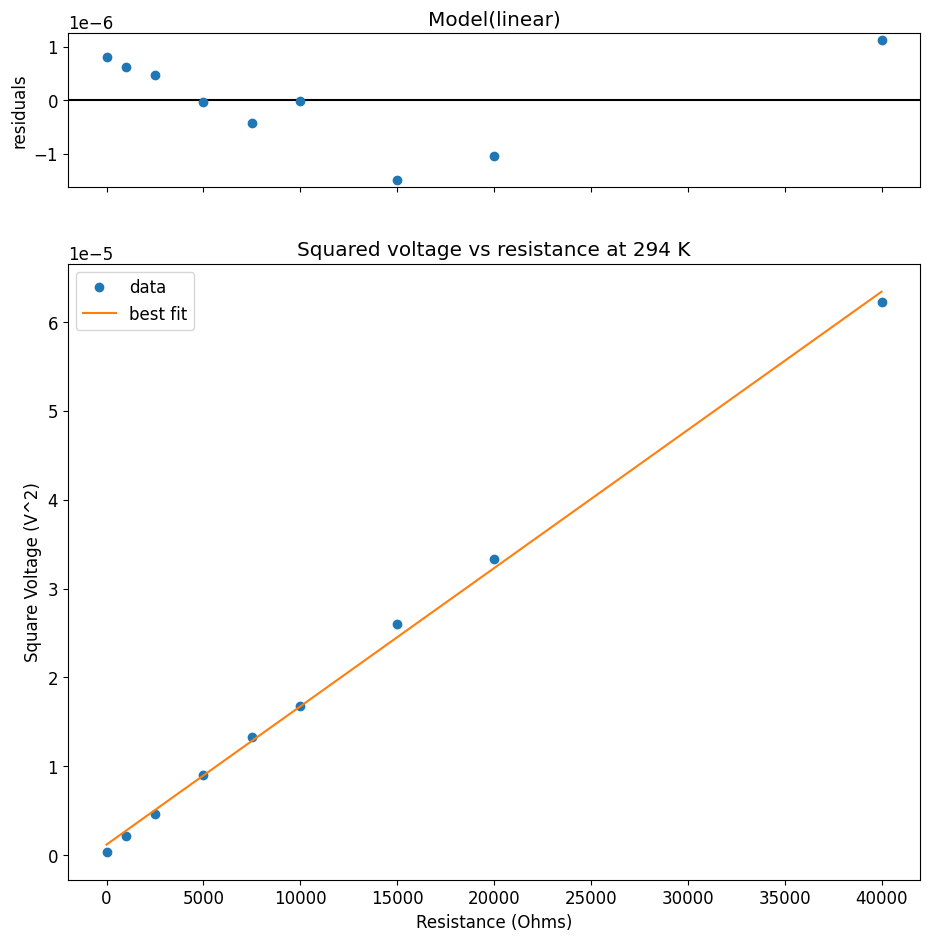

In [ ]:
## Use the functions above to run the fit for the modified 295K data
## and save the fit parameters.  Then pull out the slope
## Here is how you would use the above functions with the example data:

# update labels

# Run the fit
johnson_294_fit_params = line_fit_and_plot(johnson_294['Resistance (Ohms)'],johnson_294['Square Voltage (V^2)'])

# Obtain the slope and its uncetainty into an uncertainty object
johnson_294_slope_with_uncertainty = unc.ufloat(johnson_294_fit_params['slope'].value, johnson_294_fit_params['slope'].stderr, '294_slope')



print('Slope = {:.2uP}'.format(johnson_294_slope_with_uncertainty))

plt.title('Squared voltage vs resistance at 294 K')
plt.xlabel('Resistance (Ohms)')
plt.ylabel('Square Voltage (V^2)')

### Calculate a Boltzmann constant

From the results, calculate the implied Boltzmann constant (with uncertainty).

Revised gain of low-noise amplifier $G=10122\pm35$ (as of July 2021, DBP)

In [ ]:
johnson_294_slope_with_uncertainty

< 294_slope = 1.5552587405350225e-09+/-2.590908022435567e-11 >

In [ ]:
## Create uncertainties objects for the other quantities.  The first two are examples
T_294 = unc.ufloat(294.0,1.0, 'T_294') # K
G = unc.ufloat(10122,35, 'G') # unitless
k_B = const.Boltzmann # J/K Accepted value of Boltsmann constant from SciPy constants library.
# Bandwith in units of hertz
B = unc.ufloat(1000, 31, 'B')

# You do the rest

# V_amp_squared = unc.ufloat(johnson_294['Square Voltage (V^2)'].iloc[-1], (johnson_294['Std Rms'].iloc[-1] ** 2))



k_294 = (johnson_294_slope_with_uncertainty) / ((G**2)*4*T_294 * B )

## Calculate and print k_Boltzmann
# Use the following print line:
print('Boltzmann constant from T = 294K data = {:.2uP} J/K'.format(k_294))
print('Accepted value = {:.4g} J/K'.format(k_B))

Boltzmann constant from T = 294K data = (1.291±0.047)×10⁻²³ J/K
Accepted value = 1.381e-23 J/K


### 77 K data
Repeat the process for the 77K data set.

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 9
    # variables        = 2
    chi-square         = 3.6448e-13
    reduced chi-square = 5.2069e-14
    Akaike info crit   = -273.537662
    Bayesian info crit = -273.143213
    R-squared          = 0.99846898
[[Variables]]
    slope:      4.3090e-10 +/- 6.3775e-12 (1.48%) (init = 4.308997e-10)
    intercept:  5.9891e-07 +/- 1.0443e-07 (17.44%) (init = 5.989066e-07)
Slope = (4.31±0.26)×10⁻¹⁰


Text(0, 0.5, 'Square Voltage (V^2)')

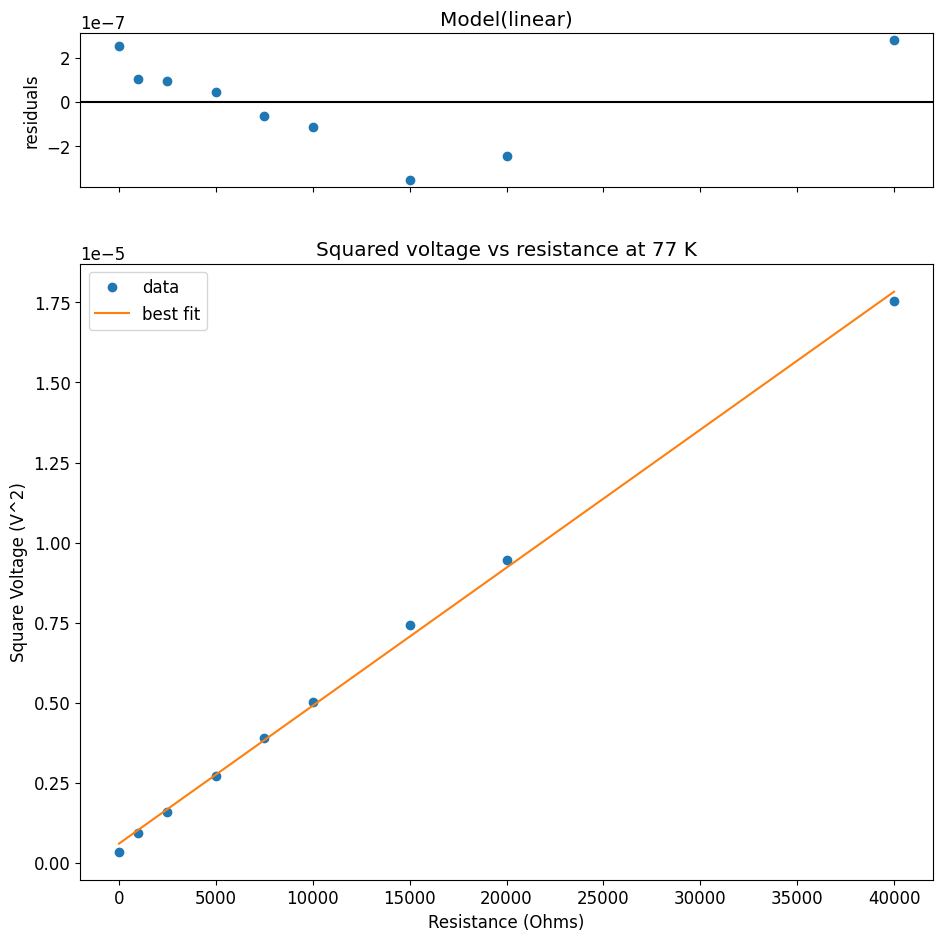

In [ ]:
## Repeat for the 77K data
johnson_77_fit_params = line_fit_and_plot(johnson_77['Resistance (Ohms)'],johnson_77['Square Voltage (V^2)'])

# Obtain the slope and its uncetainty into an uncertainty object
johnson_77_slope_with_uncertainty = unc.ufloat(johnson_77_fit_params['slope'].value, johnson_294_fit_params['slope'].stderr, '77_slope')




print('Slope = {:.2uP}'.format(johnson_77_slope_with_uncertainty))


plt.title('Squared voltage vs resistance at 77 K')
plt.xlabel('Resistance (Ohms)')
plt.ylabel('Square Voltage (V^2)')

In [ ]:
T_77 = unc.ufloat(77.0,1.0, 'T_77') # K


k_77 = (johnson_294_slope_with_uncertainty) / ((G**2)*4*T_77 * B )

## Calculate and print k_Boltzmann
# Use the following print line:
print('Boltzmann constant from T = 77K data = {:.2uP} J/K'.format(k_77))
print('Accepted value = {:.4g} J/K'.format(k_B))


Boltzmann constant from T = 77K data = (4.93±0.19)×10⁻²³ J/K
Accepted value = 1.381e-23 J/K


And finally, the difference data

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 9
    # variables        = 2
    chi-square         = 3.5131e-12
    reduced chi-square = 5.0187e-13
    Akaike info crit   = -253.145771
    Bayesian info crit = -252.751322
    R-squared          = 0.99783401
[[Variables]]
    slope:      1.1244e-09 +/- 1.9800e-11 (1.76%) (init = 1.124359e-09)
    intercept:  5.9842e-07 +/- 3.2421e-07 (54.18%) (init = 5.984212e-07)
Slope = (1.124±0.020)×10⁻⁹


Text(0, 0.5, 'Square Voltage (V^2)')

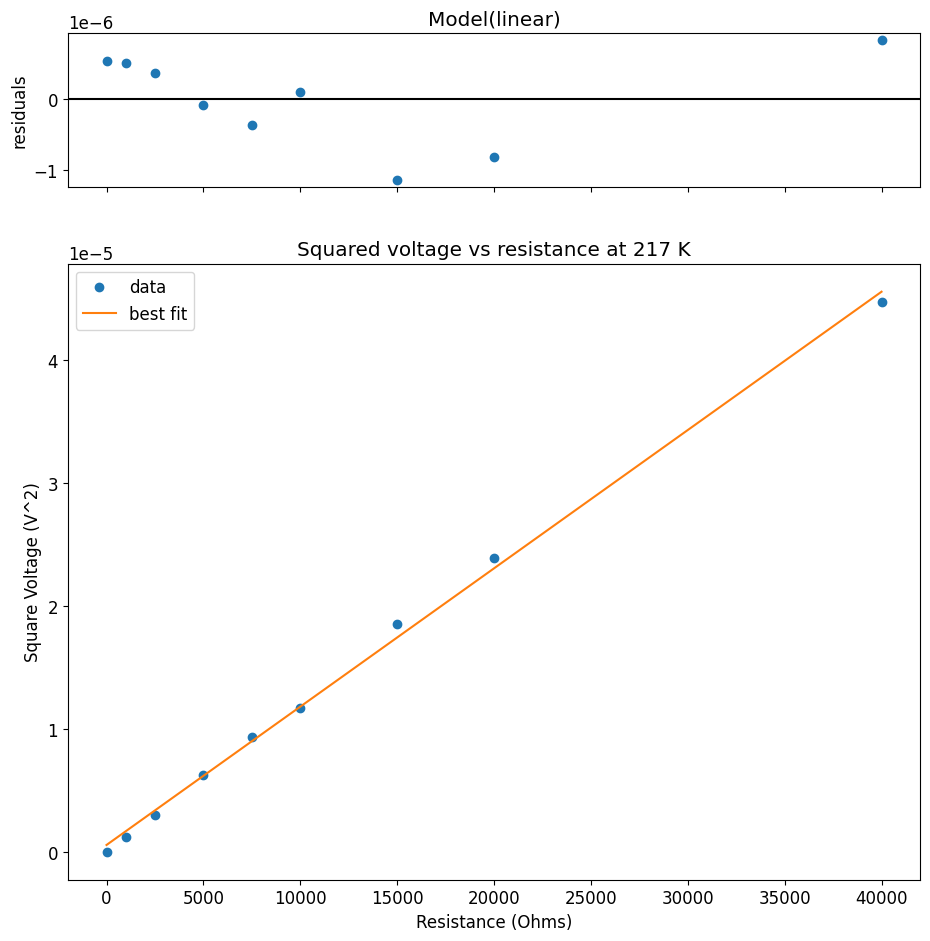

In [ ]:
## Repeat for the "difference" data (295K-77K) subracted in quadrature


johnson_difference_fit_params = line_fit_and_plot(johnson_77['Resistance (Ohms)'],squared_diffence)

# Obtain the slope and its uncetainty into an uncertainty object
johnson_difference_slope_with_uncertainty = unc.ufloat(johnson_difference_fit_params['slope'].value, johnson_difference_fit_params['slope'].stderr, '217_slope')

print('Slope = {:.2uP}'.format(johnson_difference_slope_with_uncertainty))


plt.title('Squared voltage vs resistance at 217 K')
plt.xlabel('Resistance (Ohms)')
plt.ylabel('Square Voltage (V^2)')


In [ ]:
T_217 = unc.ufloat(217.0,1.0, 'T_217') # K


k_217 = (johnson_difference_slope_with_uncertainty) / ((G**2)*4*T_217 * B )

## Calculate and print k_Boltzmann
# Use the following print line:
print('Boltzmann constant from T = 77K data = {:.2uP} J/K'.format(k_217))
print('Accepted value = {:.4g} J/K'.format(k_B))


Boltzmann constant from T = 77K data = (1.264±0.046)×10⁻²³ J/K
Accepted value = 1.381e-23 J/K


### Plot everything on one graph

Make a single plot that shows all three sets of data (as points) and the three fit lines (as lines).  Include a legend.

The cell below shows how to create a fit line using an arbitrary set of x-values based on the range of x data.  It uses the example data sets.

OK, it is your turn.

In [ ]:
johnson_294.columns

Index(['Resistance (Ohms)', 'Average Rms ', 'Std Rms', 'Square Voltage (V^2)'], dtype='object')

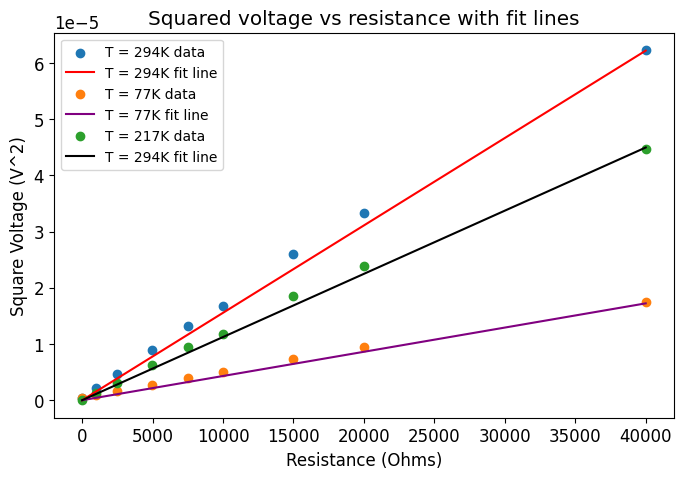

In [ ]:
## Make single a plot of all data and fit lines

fig, ax = plt.subplots(figsize=(8,5))

x_range = np.linspace(0, np.max(johnson_294['Resistance (Ohms)']), 1000)

# 294 Data
ax.scatter(johnson_294['Resistance (Ohms)'],johnson_294['Square Voltage (V^2)'] ,label='T = 294K data')
ax.plot(x_range, x_range *johnson_294_slope_with_uncertainty.nominal_value, label= 'T = 294K fit line', color = 'r')

# 77 Data
ax.scatter(johnson_77['Resistance (Ohms)'],johnson_77['Square Voltage (V^2)'], label='T = 77K data')
ax.plot(x_range, x_range *johnson_77_slope_with_uncertainty.nominal_value, label= 'T = 77K fit line', color='purple' )


# Difference


ax.scatter(johnson_294['Resistance (Ohms)'],squared_diffence, label='T = 217K data')
ax.plot(x_range, x_range *johnson_difference_slope_with_uncertainty.nominal_value, label= 'T = 294K fit line', color='black' )




ax.set_title('Squared voltage vs resistance with fit lines')
ax.set_xlabel('Resistance (Ohms)')
ax.set_ylabel('Square Voltage (V^2)')

ax.legend(prop={'size': 10})
# Add this


### Part c.

Summary of results for Boltsmann constant:

In [ ]:



print('  T (K)  |  k_B (J/K)   ')
print('---------|--------------------')
print('   294   | {:.1uP}'.format(k_294))
print('    77   | {:.1uP}'.format(k_77))
print(' 294-77  | {:.1uP}'.format(k_217))
print('Accepted | {:10.4g}'.format(k_B))


  T (K)  |  k_B (J/K)   
---------|--------------------
   294   | (1.29±0.05)×10⁻²³
    77   | (4.9±0.2)×10⁻²³
 294-77  | (1.26±0.05)×10⁻²³
Accepted |  1.381e-23


In [ ]:
print('Percent contribution to statistical uncertainty of k_294:')
for (var,error) in k_294.error_components().items():
    # print(var.tag)
    print('{:>6s}: {:.3%}'.format(var.tag,(error/k_294.s)**2))

print('Percent contribution to statistical uncertainty of k_77:')
for (var,error) in k_77.error_components().items():
    # print(var.tag)
    print('{:>6s}: {:.3%}'.format(var.tag,(error/k_77.s)**2))


print('Percent contribution to statistical uncertainty of k_217:')
for (var,error) in k_217.error_components().items():
    # print(var.tag)
    print('{:>6s}: {:.3%}'.format(var.tag,(error/k_217.s)**2))

Percent contribution to statistical uncertainty of k_294:
     B: 74.042%
 T_294: 0.891%
     G: 3.685%
294_slope: 21.382%
Percent contribution to statistical uncertainty of k_77:
     B: 66.048%
  T_77: 11.592%
     G: 3.287%
294_slope: 19.074%
Percent contribution to statistical uncertainty of k_217:
     B: 71.708%
 T_217: 1.585%
     G: 3.569%
217_slope: 23.139%


In [ ]:

print('Percent contribution to statistical uncertainty of k_294:')
for (var,error) in k_294.error_components().items():
    # print(var.tag)
    print('{:>6s}: {:.3%}'.format(var.tag,(error/k_294.s)**2))

Percent contribution to statistical uncertainty of k_294:
     B: 74.042%
 T_294: 0.891%
     G: 3.685%
294_slope: 21.382%


## Exercise 3: Noise Figure

Calculate the "noise figure" for the low-noise amp, as described in the instructions.

The noise figure is defined:

$$ NF = 20\log_{10}\frac{V_{rms}(R)}{G\times\sqrt{4k_BTRB}} \; \text{dB}$$

Please limit the noise figure to 2 digits beyond the decimal point.  

Note: It clearly does not work for $R=0$.  You will need to leave this out of the calculations.

In [ ]:
## Calculate the Noise figure for the various values of R at
## room temperature and display it as a table or a plot

## Make a data frame to display


johnson_294_nonzero = johnson_294[johnson_294['Resistance (Ohms)'] != 0]

T_294_sqrt = unc.ufloat(np.sqrt(294.0), 1.0)
B_sqrt = unc.ufloat(np.sqrt(B.nominal_value), np.sqrt(B.s))


numerator = 20 * np.log10(johnson_294_nonzero['Average Rms '])
denomonator = log10(G *T_294_sqrt * B_sqrt) + np.log10(np.sqrt(4*k_B*johnson_294_nonzero['Resistance (Ohms)']))


johnson_294_nonzero['Noise Figure'] =  (numerator - denomonator)


<ipython-input-26-569470cf7ddb>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  johnson_294_nonzero['Noise Figure'] =  (numerator - denomonator)


In [ ]:
Noise_figure_nominal = np.zeros(johnson_294_nonzero['Noise Figure'].shape[0])
Noise_figure_error = np.zeros(johnson_294_nonzero['Noise Figure'].shape[0])

for i in range(johnson_294_nonzero['Noise Figure'].shape[0]):
  Noise_figure_nominal[i] = johnson_294_nonzero['Noise Figure'].loc[i].nominal_value
  Noise_figure_error[i] = johnson_294_nonzero['Noise Figure'].loc[i].s


In [ ]:
Noise_figure_nominal_rounded = np.around(Noise_figure_nominal, 2)

noise_figure_df = pd.DataFrame({'Noise Figure nominal': Noise_figure_nominal_rounded, 'Noise Figure Error': Noise_figure_error})

noise_figure_df['Resistance (Ohms)'] = johnson_294_nonzero['Resistance (Ohms)']
noise_figure_df.head(10)

,Noise Figure nominal,Noise Figure Error,Resistance (Ohms)
0,-39.97,0.080565,40000
1,-42.53,0.080565,20000
2,-43.55,0.080565,15000
3,-45.37,0.080565,9990
4,-46.31,0.080565,7500
5,-47.92,0.080565,4990
6,-50.66,0.080565,2500
7,-53.82,0.080565,1000


<ErrorbarContainer object of 3 artists>

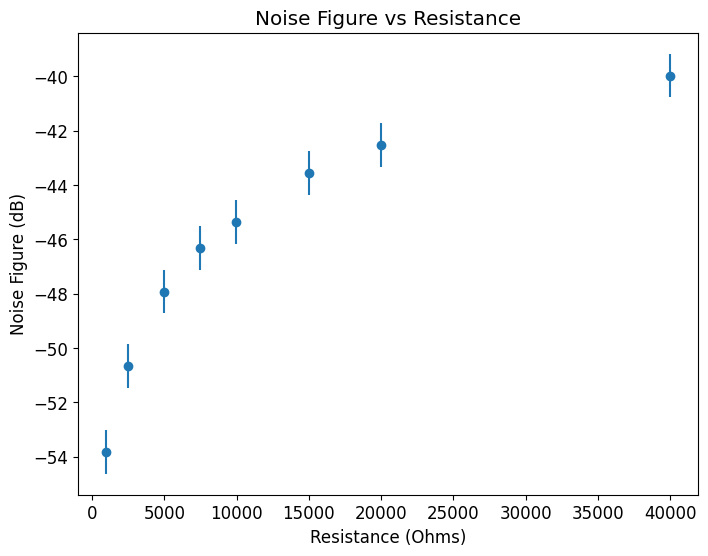

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))

ax.set_title('Noise Figure vs Resistance')
ax.set_xlabel('Resistance (Ohms)')
ax.set_ylabel('Noise Figure (dB)')

ax.errorbar(noise_figure_df['Resistance (Ohms)'], noise_figure_df['Noise Figure nominal'], yerr= noise_figure_df['Noise Figure Error'] * 10, fmt='o', label= '')

## Shot Noise Analysis

This is very similar to the Johnson noise analysis.

### Read in the data

Now the column names need to split at `m` to convert the current labels into currents.

In [ ]:
## Read in the shot noise data and display it
shot_noise_path = '/content/Johnson and Shot Noise data - Shot.csv'

shot_df = pd.read_csv(shot_noise_path)

# Averages were already taken in the spreadsheet so I will just drop the trial columns

drop_columns = ['Rms reading 1 ', 'Rms reading 2', 'Rms reading 3', 'Rms reading 4', 'Rms reading 5']

shot_df = shot_df.drop(columns=drop_columns)


### Obtain averages





10        0.0000      0.002969  0.000045     0.000009

In [ ]:
# Averages were already taken in the spreadsheet
shot_df = shot_df.sort_values(by=['Current (mA)'], ascending=True).reset_index(drop=True).dropna()

shot_df['Current (A)'] = shot_df['Current (mA)'] / 1000



print(shot_df.head(15))



    Current (mA)  Average Rms    Std Rms  Current (A)
0         0.0000      0.002969  0.000045     0.000000
1         0.0098      0.004104  0.000035     0.000010
2         0.0265      0.005697  0.000057     0.000027
3         0.0393      0.006870  0.000080     0.000039
4         0.0565      0.008384  0.000078     0.000057
5         0.0745      0.009883  0.000142     0.000074
6         0.0857      0.010782  0.000085     0.000086
7         0.1074      0.012502  0.000165     0.000107
8         0.1212      0.013684  0.000107     0.000121
9         0.1378      0.014942  0.000139     0.000138
10        0.1561      0.016260  0.000080     0.000156


### Plot the raw data

In [ ]:
print(shot_df.columns)

Index(['Current (mA)', 'Average Rms ', 'Std Rms', 'Current (A)'], dtype='object')


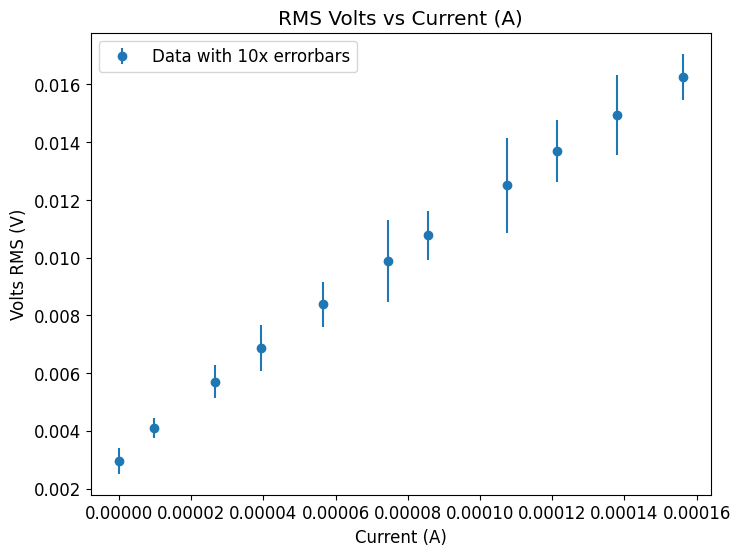

In [ ]:
## Plot it


fig, ax = plt.subplots(figsize = (8,6))
# Set labels
ax.set_title('RMS Volts vs Current (A)')
ax.set_ylabel('Volts RMS (V)')
ax.set_xlabel('Current (A)')

# Multiply error bars by 10 for visibility
ax.errorbar(shot_df['Current (A)'], shot_df['Average Rms '], yerr= shot_df['Std Rms'] * 10, fmt='o', label= 'Data with 10x errorbars')
ax.legend(loc='upper left')

### Calculate $V^2_{rms}$

In [ ]:
## transform the data, like you did with Johnson noise

# Create a rms squared column
shot_df['rms squared'] = shot_df['Average Rms '] ** 2


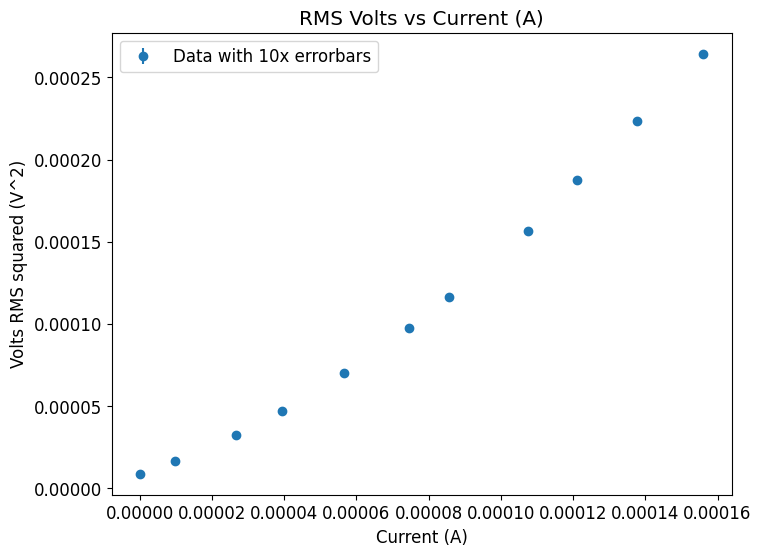

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))

ax.set_title('RMS Volts vs Current (A)')
ax.set_ylabel('Volts RMS squared (V^2)')
ax.set_xlabel('Current (A)')


ax.errorbar(shot_df['Current (A)'], shot_df['rms squared'], yerr= shot_df['Std Rms'] ** 2, fmt='o', label= 'Data with 10x errorbars')
ax.legend(loc='upper left')

## Fitting a line to all of the data

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 11
    # variables        = 2
    chi-square         = 1.5776e-09
    reduced chi-square = 1.7529e-10
    Akaike info crit   = -245.318016
    Bayesian info crit = -244.522225
    R-squared          = 0.97907915
[[Variables]]
    slope:      1.63388894 +/- 0.07961265 (4.87%) (init = 1.633889)
    intercept: -1.0051e-05 +/- 7.1212e-06 (70.85%) (init = -1.005089e-05)
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 11
    # variables        = 2
    chi-square         = 1.5776e-09
    reduced chi-square = 1.7529e-10
    Akaike info crit   = -245.318016
    Bayesian info crit = -244.522225
    R-squared          = 0.97907915
[[Variables]]
    slope:      1.63388894 +/- 0.07961265 (4.87%) (init = 1.633889)
    intercept: -1.0051e-05 +/- 7.1212e-06 (70.85%) (init = -1.005089e-05)


Text(0.5, 1.0, 'Linear Model fit to all of data')

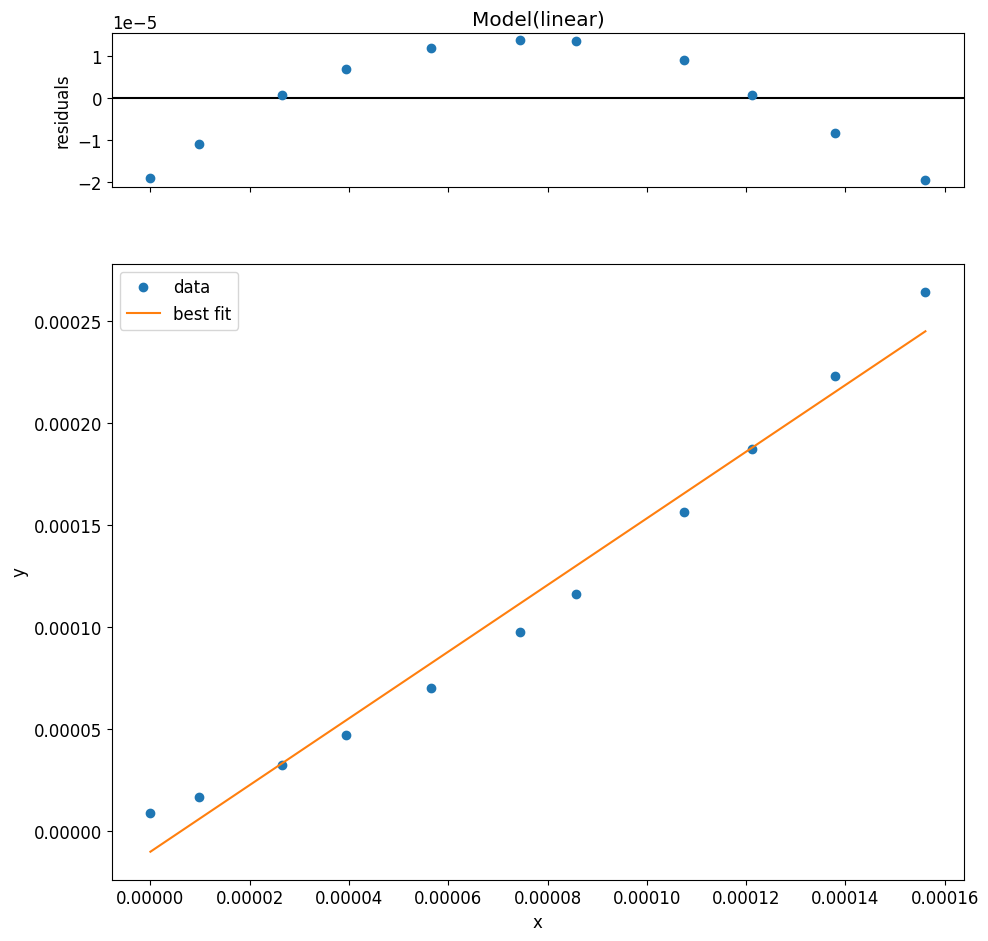

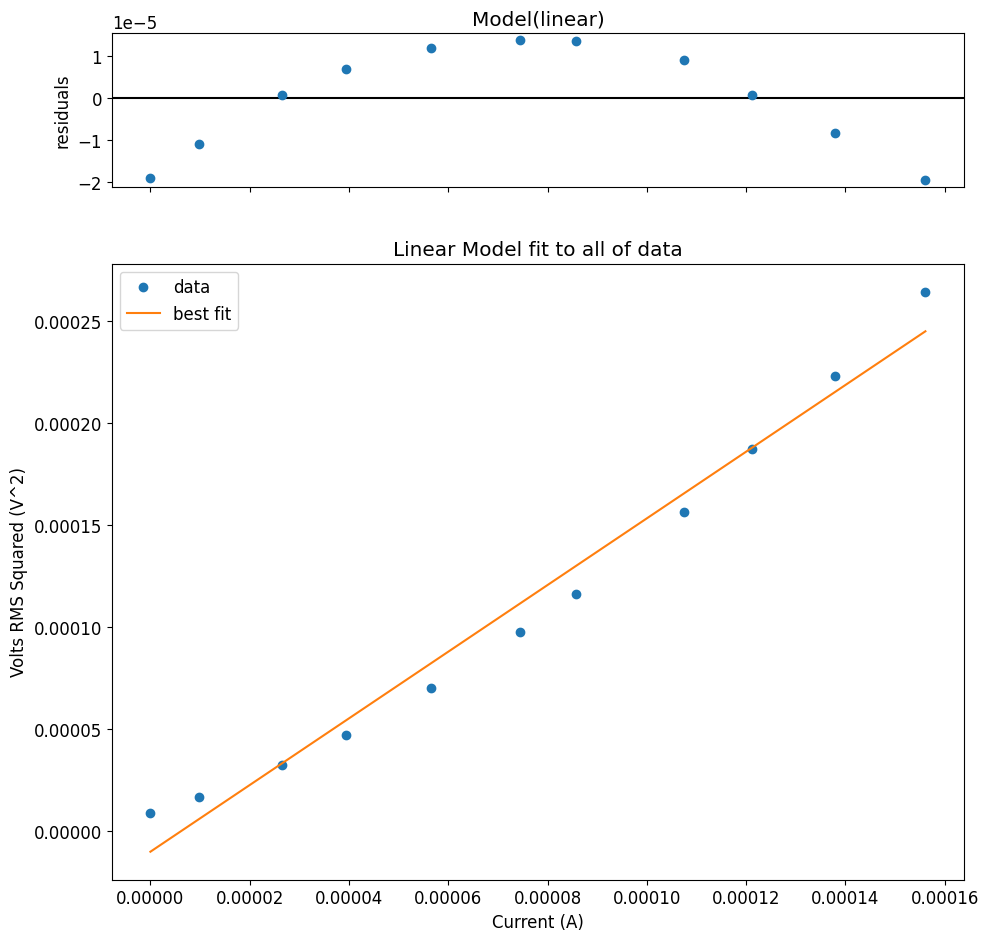

In [ ]:


shot_fit_params = line_fit_and_plot(shot_df['Current (A)'], shot_df['rms squared'])

# Obtain the slope and its uncetainty into an uncertainty object

shot_fit_full_data_params = line_fit_and_plot(shot_df['Current (A)'], shot_df['rms squared'])



shot_slope_full_data_with_uncertainty = get_uslope(shot_fit_full_data_params)
print('Slope = {:.2uP}'.format(shot_slope_full_data_with_uncertainty))

all_data_slope = shot_fit_full_data_params['slope']
all_data_slope_intercept = shot_fit_full_data_params['intercept']

plt.xlabel('Current (A)')
plt.ylabel('Volts RMS Squared (V^2)')
plt.title('Linear Model fit to all of data')

## Fitting to the lower half of the data

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 6
    # variables        = 2
    chi-square         = 7.0983e-11
    reduced chi-square = 1.7746e-11
    Akaike info crit   = -146.962077
    Bayesian info crit = -147.378558
    R-squared          = 0.98749608
[[Variables]]
    slope:      1.18809512 +/- 0.06684618 (5.63%) (init = 1.188095)
    intercept:  4.6364e-06 +/- 2.8733e-06 (61.97%) (init = 4.636359e-06)
Slope = 1.188±0.067


Text(0.5, 1.0, 'Linear Model fit to Lower half of data')

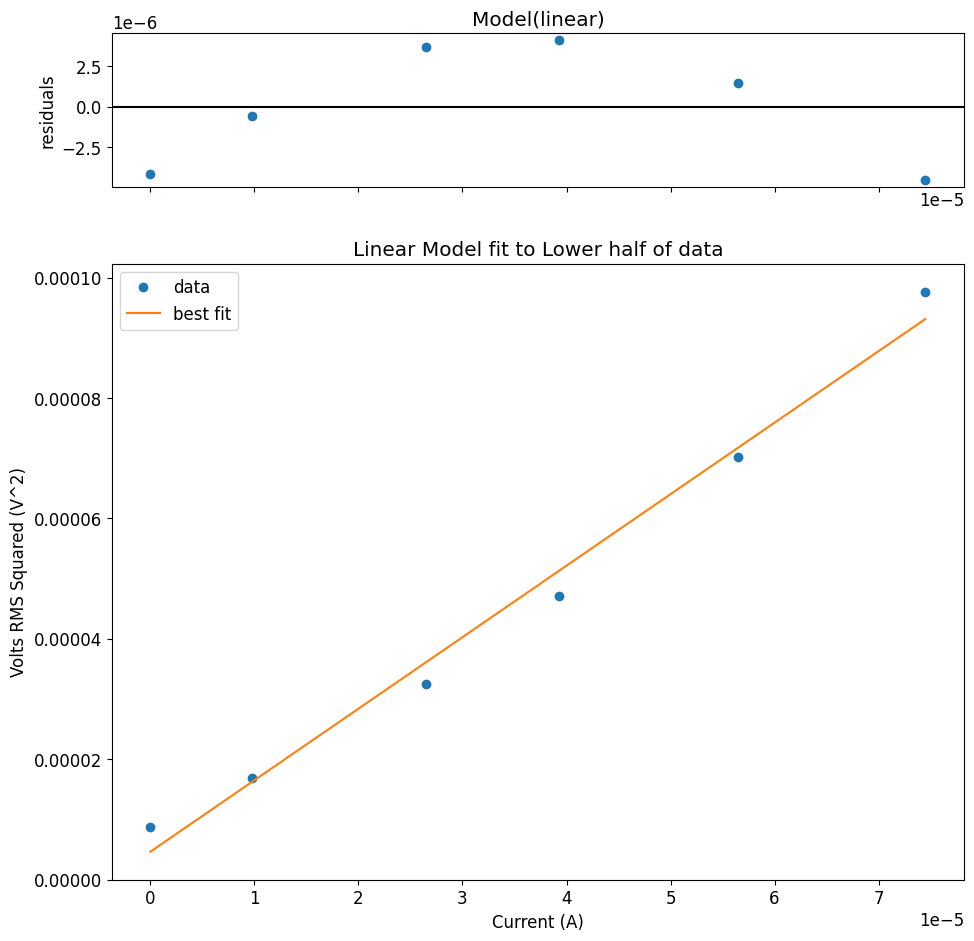

In [ ]:


## Then try the lower half of the data, before the 1/f takes over

shot_lower_half = shot_df[shot_df['Current (A)'] <= shot_df['Current (A)'].iloc[5]]


shot_fit_params = line_fit_and_plot(shot_lower_half['Current (A)'], shot_lower_half['rms squared'])

# Obtain the slope and its uncetainty into an uncertainty object
shot_slope_lower_half_with_uncertainty = get_uslope(shot_fit_params)
print('Slope = {:.2uP}'.format(shot_slope_lower_half_with_uncertainty))

lower_half_slope = shot_fit_params['slope']
lower_half_slope_intercept = shot_fit_params['intercept']

plt.xlabel('Current (A)')
plt.ylabel('Volts RMS Squared (V^2)')
plt.title('Linear Model fit to Lower half of data')


Optional: Another way out of the $1/f$ problem is to fit a quadratic, and use the linear-term coefficient as the initial slope.

[[Model]]
    Model(parabolic)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 11
    # variables        = 3
    chi-square         = 1.0793e-11
    reduced chi-square = 1.3491e-12
    Akaike info crit   = -298.150673
    Bayesian info crit = -296.956988
    R-squared          = 0.99985688
[[Variables]]
    a:  5505.72958 +/- 161.557748 (2.93%) (init = 5505.73)
    b:  0.79297325 +/- 0.02564488 (3.23%) (init = 0.7929733)
    c:  8.1872e-06 +/- 8.2262e-07 (10.05%) (init = 8.18718e-06)


Text(0.5, 1.0, 'Quadratic Model fit to all of data')

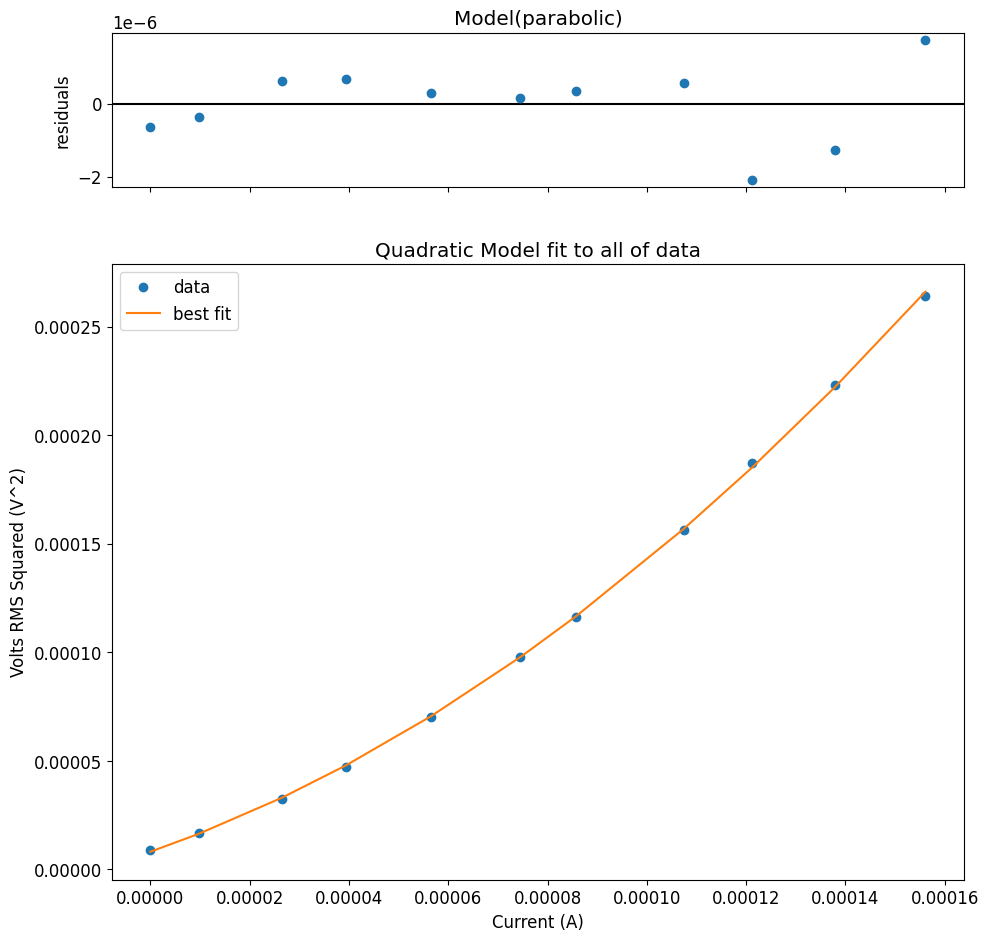

In [ ]:
## To do this, you need a different fitting model
#  Below will get you started, but you need to study the docs to understand the parameters.

from lmfit.models import QuadraticModel
quadratic = QuadraticModel()

## You do the rest
xdata = shot_df['Current (A)']

ydata = shot_df['rms squared']


param_guess = quadratic.guess(ydata, x=xdata)

model_fit = quadratic.fit(ydata, param_guess, x=xdata)

print(model_fit.fit_report(show_correl=False))
model_fit.plot()

quadratic_model_params = model_fit.params

plt.xlabel('Current (A)')
plt.ylabel('Volts RMS Squared (V^2)')
plt.title('Quadratic Model fit to all of data')


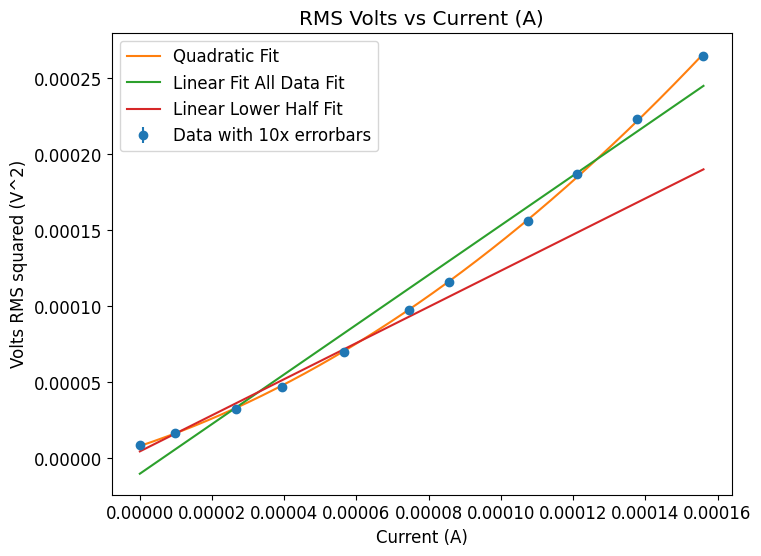

In [ ]:
a = quadratic_model_params['a'].value
b = quadratic_model_params['b'].value
c = quadratic_model_params['c'].value


quadratic_fit_slope_with_error = unc.ufloat(quadratic_model_params['b'].value, quadratic_model_params['b'].stderr)


fig, ax = plt.subplots(figsize = (8,6))

ax.set_title('RMS Volts vs Current (A)')
ax.set_ylabel('Volts RMS squared (V^2)')
ax.set_xlabel('Current (A)')


ax.errorbar(shot_df['Current (A)'], shot_df['rms squared'], yerr= shot_df['Std Rms'] ** 2, fmt='o', label= 'Data with 10x errorbars')

x_range = np.linspace(0, np.max(shot_df['Current (A)']), 1000)
quad_fit = a * x_range**2 + b* x_range + c

ax.plot(x_range, quad_fit, label = 'Quadratic Fit' )
# ax.plot(x_range, b* x_range + c, label = 'Linear term from Quadratic fit')
ax.plot(x_range, all_data_slope * x_range + all_data_slope_intercept, label = 'Linear Fit All Data Fit')

ax.plot(x_range, lower_half_slope * x_range + lower_half_slope_intercept, label = 'Linear Lower Half Fit ')
ax.legend(loc='upper left');


### Calculate Electron Charge

Use the fit results, propagate the uncertainty, and find a value for $e$.

In [ ]:
## Calculate e with uncertainty and print it (with units)
## Compare with the accepted value

# You will need this
R_load = unc.ufloat(4976,1) # Load resistance of shot noise box in ohms

e_1 = shot_slope_full_data_with_uncertainty / (2* B * (R_load **2) * G **2)

e_2 = lower_half_slope / (2* B * (R_load **2) * G **2)

e_3 = quadratic_fit_slope_with_error / (2* B * (R_load **2) * G **2 )

print('\nElectron charge from whole data set = {:.2uP} C'.format(e_1))
print('Electron charge from partial data set = {:.2uP} C'.format(e_2))
print('Electron charge from quadratic fit = {:.2uP} C'.format(e_3))
print('\nAccepted value = {:.4g} C'.format(const.e))


Electron charge from whole data set = (3.22±0.19)×10⁻¹⁹ C
Electron charge from partial data set = (2.342±0.074)×10⁻¹⁹ C
Electron charge from quadratic fit = (1.563±0.071)×10⁻¹⁹ C

Accepted value = 1.602e-19 C


## Optional Exercise: $1/f$ noise

Measurements of the power spectral density in units of $V/\sqrt{\text{Hz}}$ were made from the "1/f noise source", along with the same values from the amplifier alone.  The curve shows a 1/f spectrum where $V^2 \propto 1/f^\alpha$.  In this exercise, one determines the exponent $\alpha$.

The data are in a file called `one_over_f_noise_data.csv`.  The first line of the data file must be skipped.  (Look at it to see why.)

In [ ]:
## Read in the data


In [ ]:
## Do the "subtract by quadrature" game to remove the mostly constant background.

## Convienence: pull out the frequency array


In [ ]:
## Make a plot  Use log axes to see a line


In [ ]:
## Fit a line to the log_10 of the data vs log_10 of the frequency.
## The slope will be -alpha.


In [ ]:
## Extract the exponent from the fit

# print('1/f noise exponent = {:.1uP}'.format(alpha))